## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [3]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


--2025-05-08 00:29:14--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  18.2MB/s    用时 0.5s    

2025-05-08 00:29:15 (18.2 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



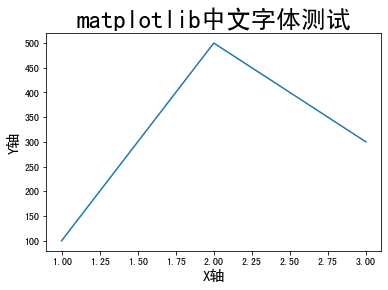

In [4]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 进入MMSegmentation主目录

In [5]:
import os
# os.chdir('mmsegmentation')

In [6]:
os.getcwd()

'/home/featurize/work/MMSegmentation_Tutorials-main/20230215/【D1】Kaggle代码实战-肾小球切片语义分割'

## 导入工具包

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [8]:
# 日志文件路径
log_path = './work_dirs/tutorial/20250427_163922/vis_data/scalars.json'

In [9]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [10]:
len(json_list)

540

In [11]:
eval(json_list[4])

{'lr': 0.00994451655954398,
 'data_time': 0.011368584632873536,
 'loss': 0.06591302827000618,
 'decode.loss_ce': 0.02706752079539001,
 'decode.loss_dice': 0.012909150123596192,
 'decode.acc_seg': 99.74229431152344,
 'aux.loss_ce': 0.011745094368234277,
 'aux.loss_dice': 0.01419126195833087,
 'aux.acc_seg': 99.86355590820312,
 'time': 0.3348379373550415,
 'iter': 250,
 'memory': 3962,
 'step': 250}

In [12]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

In [13]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.loss_dice,decode.acc_seg,aux.loss_ce,aux.loss_dice,aux.acc_seg,time,iter,memory,step
0,0.009989,0.010887,0.165263,0.062070,0.054681,99.761345,0.024396,0.024116,99.761345,0.331669,50.0,6137.0,50.0
1,0.009978,0.011284,0.105810,0.046059,0.021640,97.899284,0.020658,0.017453,97.899284,0.333432,100.0,3962.0,100.0
2,0.009967,0.012816,0.105016,0.050513,0.018425,99.247681,0.021170,0.014908,97.728539,0.336462,150.0,3962.0,150.0
3,0.009956,0.010795,0.070779,0.031661,0.012272,98.198601,0.014872,0.011975,98.692726,0.333096,200.0,3962.0,200.0
4,0.009945,0.011369,0.065913,0.027068,0.012909,99.742294,0.011745,0.014191,99.863556,0.334838,250.0,3962.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.004489,0.012396,0.014030,0.006722,0.002632,99.898987,0.002996,0.001680,99.893478,0.337771,23800.0,3962.0,23800.0
476,0.004477,0.012585,0.010873,0.005037,0.002150,99.779526,0.002332,0.001354,99.796806,0.337981,23850.0,3962.0,23850.0
477,0.004464,0.010936,0.014725,0.007712,0.001652,99.994598,0.004296,0.001065,100.000000,0.335535,23900.0,3962.0,23900.0
478,0.004452,0.011515,0.005063,0.002120,0.001008,100.000000,0.001257,0.000678,100.000000,0.338255,23950.0,3962.0,23950.0


In [14]:
df_test

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,99.08,77.43,90.50,85.58,85.58,81.76,90.50,0.003968,0.063110,400.0
1,99.50,82.75,84.21,89.64,89.64,97.19,84.21,0.004050,0.062798,800.0
2,98.31,70.48,93.41,79.48,79.48,72.52,93.41,0.003348,0.058030,1200.0
3,97.98,67.97,92.56,77.02,77.02,70.05,92.56,0.003644,0.064198,1600.0
4,99.64,88.88,94.88,93.77,93.77,92.71,94.88,0.003944,0.064775,2000.0
5,99.68,89.35,92.53,94.06,94.06,95.71,92.53,0.003782,0.062172,2400.0
6,98.97,64.33,65.19,72.64,72.64,95.78,65.19,0.003494,0.061392,2800.0
7,99.67,89.31,92.91,94.04,94.04,95.23,92.91,0.003543,0.062271,3200.0
8,99.72,90.70,93.53,94.89,94.89,96.33,93.53,0.003639,0.059618,3600.0
9,99.54,86.35,94.30,92.14,92.14,90.18,94.30,0.003751,0.060919,4000.0


## 导出训练日志表格

In [15]:
df_train.to_csv('./mmsegmentation/图表/训练日志-训练集2.csv', index=False)
df_test.to_csv('./mmsegmentation/图表/训练日志-测试集2.csv', index=False)

## 可视化辅助函数

In [16]:
from matplotlib import colors as mcolors
import random
random.seed(253)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [17]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

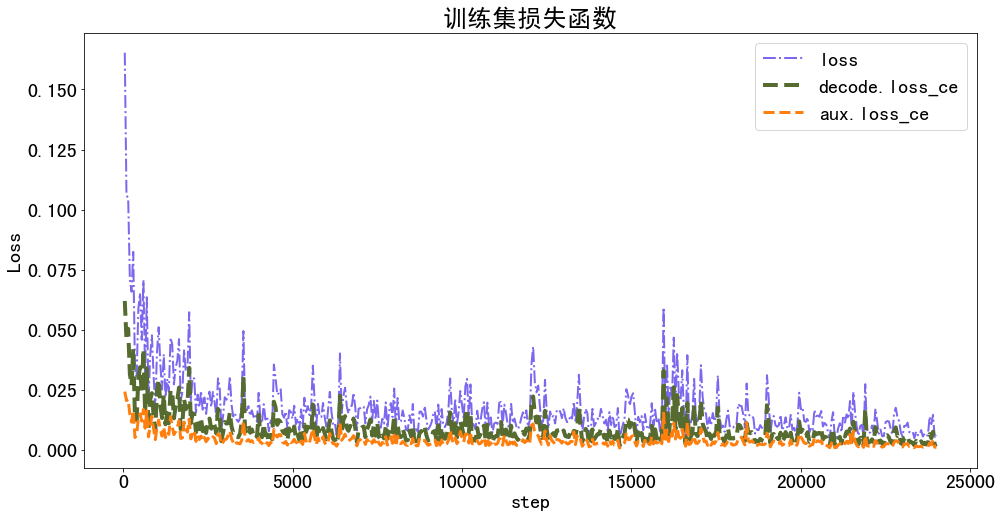

In [18]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('./mmsegmentation/图表/训练集损失函数2.pdf', dpi=240, bbox_inches='tight')

plt.show()

## 训练集准确率

In [19]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

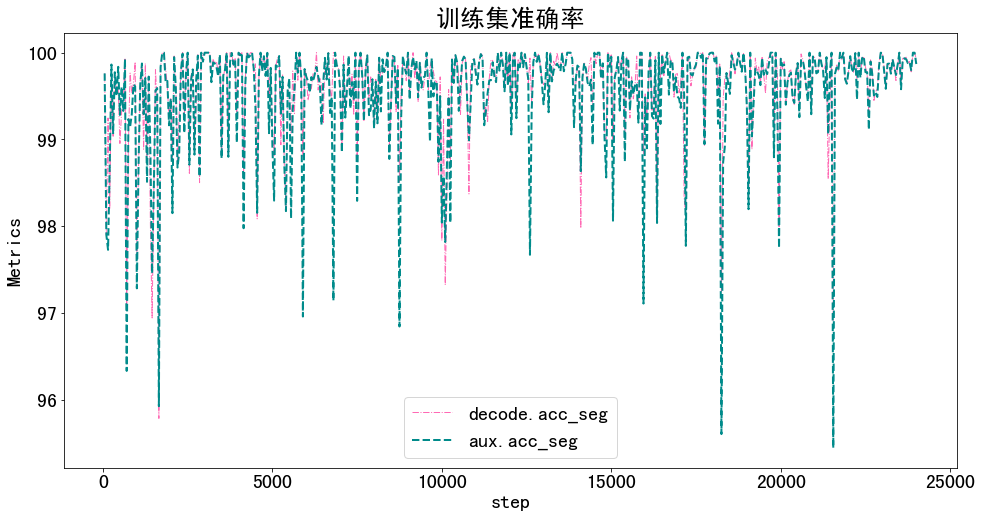

In [20]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('训练集准确率', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('./mmsegmentation/图表/训练集准确率2.pdf', dpi=240, bbox_inches='tight')

plt.show()

## 测试集评估指标

In [21]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall',
       'data_time', 'time', 'step'],
      dtype='object')

In [22]:
metrics = ['aAcc', 'mIoU', 'mRecall', 'mPrecision', 'mFscore', 'mDice']#, 'mAcc']

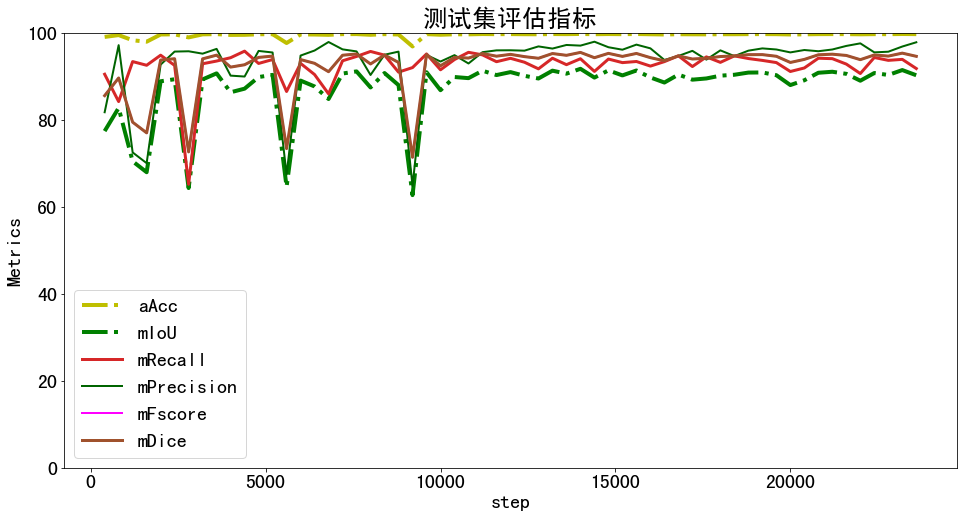

In [23]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('测试集评估指标', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('./mmsegmentation/图表/测试集分类评估指标2.pdf', dpi=240, bbox_inches='tight')

plt.show()